# 线性模型笔记

对于scikit learn的学习，比我预期的更加复杂和繁琐，涉及了很多一直处于似懂非懂的知识内容，作为一个已经远远不年轻的人，需要更加认真的对待这次学习。期待能够在学习python算法实现工具的同时，熟悉这些工具背后的数学知识。

这不是论文，只是我的学习笔记，所以这里把主要的参考网站和书籍列举在开始部分：

1、http://scikit-learn.org/stable/modules/linear_model.html

2、http://blog.csdn.net/zouxy09/article/details/24971995

3、
## 线性模型概述
所谓线性模型，是指目标变量可以由自变量的线性组合所解释的一类统计模型，其中核心的部分可以用如下公式表示:
$$\hat{y\ }(\boldsymbol{\omega\ },\mathbf{x\ })=\omega_0+\omega_1x_1+\omega_2x_2+\cdots+\omega_px_p$$
其中$\hat{y\ }$表示对实际目标变量y的预测值。所谓有监督学习的目的，就是通过已知的自变量$\mathbf{x\ }=\{x_1,x_2,\cdots,x_p\}$与目标变量y，基于某个优化函数计算出相应的模型参数，从而构建预测器。在线性模型中，最主要的参数就是自变量的系数向量（包括常数项$\omega_0$）$\boldsymbol{\omega\ }=\{\omega_0,\omega_1,\cdots,\omega_p\}$。
对于不同的线性模型而言，有不同的优化函数。一般来讲，优化函数可以被写成以下的形式：
$$\arg\min_\boldsymbol\omega\{\sum_kL(y_k,f(\mathbf{x}_k,\boldsymbol{\omega\ }))+\alpha\Omega(\boldsymbol{\omega\ })\}$$
其中$L$是对预测值与真实目标变量值的比较，而$\Omega$则是对系数向量的正则化（regularization）
为了行文方便，在下文中约定：
$X$为训练数据，为了对应常数项，数据增加的默认值为1的第一列，即:
$$
X= \begin{pmatrix}
  1 & x_{11} & x_{12} & \cdots & x_{1p} \\
  1 & x_{21} & x_{22} & \cdots & x_{2p} \\
  \vdots & \vdots  & \vdots  & \ddots & \vdots  \\
  1 & x_{m1} & x_{m2} & \cdots & x_{np} 
 \end{pmatrix}
$$
$\mathbf{y}$为训练数据对应的目标变量值组成的向量。$\boldsymbol\omega$为待优化的参数向量。分别记作：
$$\mathbf{y}=\left(
    \begin{array}{c}
      y_1 \\
      y_2 \\
      \vdots \\
      y_n
    \end{array}
  \right),
  \boldsymbol\omega=\left(
    \begin{array}{c}
      \omega_0 \\
      \omega_1 \\
      \vdots \\
      \omega_p
    \end{array}
  \right)
$$  
## 最小二乘法
最小二乘法( Ordinary Least Squares)是最为经典的一类算法，其基本思路是以预测值与真实目标值的误差平方和为优化函数，通过解析方法即可以获得使其最小的目标系数向量。其优化函数可以记为：
$$\min_\boldsymbol\omega\|X\boldsymbol{\omega}-\mathbf{y} \|_2^2$$
其优化过程可以表示为：
$$\begin{align*}
\mathbf{y} &= X\boldsymbol{\omega}+\boldsymbol{\epsilon}\\
X^T\mathbf{y} &= X^TX\boldsymbol{\omega}+X^T\boldsymbol{\epsilon}\\
(X^TX)^{-1}X^T\mathbf{y} &= (X^TX)^{-1}X^TX\boldsymbol{\omega}+(X^TX)^{-1}X^T\boldsymbol{\epsilon}\\
\boldsymbol{\omega} &= (X^TX)^{-1}X^T\mathbf{y}+(X^TX)^{-1}X^T\boldsymbol{\epsilon}
\end{align*}$$
其中，$\boldsymbol{\epsilon}$是预测值与真实目标值的误差组成的向量，一般认为误差向量是一组独立的同时服从期望为0的正态分布的随机变量，因此$(X^TX)^{-1}X^T\mathbf{y}$就是对$\boldsymbol{\omega}$的无偏估计。而且可以以此为基础计算相应的误差方差。
在scikit-learn工具包的线性模型模块中，线性回归方法是完全依赖最小二乘法的方法，其命令如下：

coef is: 1.99432
intercept is: 0.98504


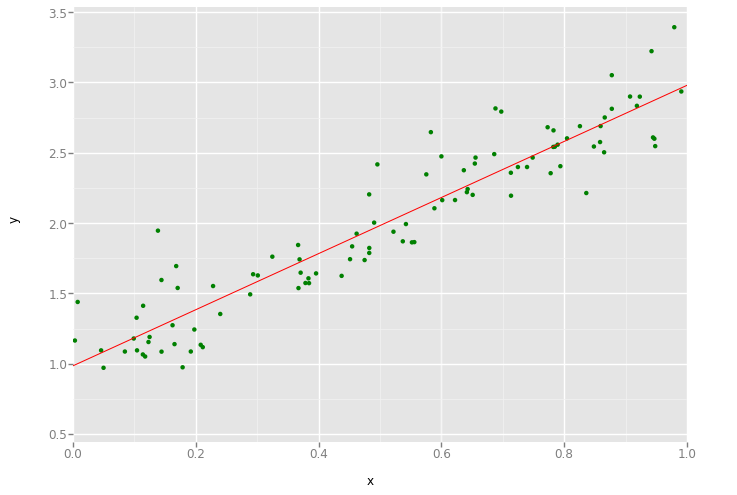

<ggplot: (-9223372036841068491)>

In [2]:
%matplotlib inline
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import sklearn as sl
from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import ggplot
#prepare the data
n_points=100
X1=np.random.rand(n_points).reshape(n_points,1)
X=np.hstack((np.ones((n_points,1)),X1))
y=X.dot(np.array([[1,2],]).T)+0.2*np.random.randn(n_points,1)
#initialize the  LinearRegression class, get one object reg
reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
#train the model
reg.fit(X1,y)
#print results
print("coef is: %.5f" %reg.coef_)
print("intercept is: %.5f" %reg.intercept_)
#plot with ggplot package...may be not the best idea
## create data to draw
data=DataFrame(np.hstack((X1,y)),columns=['x','y'])
#ggplot
gp=ggplot.ggplot(ggplot.aes(x='x',y='y'),data=data)+\
    ggplot.geom_point(color='green')+\
    ggplot.geom_abline(intercept=reg.intercept_, slope=reg.coef_[0],color='red')+\
    ggplot.xlim(0,1)
gp